In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import sys

sys.path.append("..")
from src.visualization.visualize import DrawNBACourt
from src.utils import load_joblib

In [2]:
%matplotlib inline

train_raw_fp = Path("../data") / "raw" / "train.jbl"
train_interim_fp = Path("../data") / "interim" / "train.jbl"

x_length = 47
y_length = 50

In [3]:
train = load_joblib(train_interim_fp)
train

,frame,scr_x,scr_y,usr_x,usr_y,uDF_x,uDF_y,bal_x,bal_y,is_screen_play,filename
0,0,2.89,4.74,5.49,1.50,2.78,5.22,6.98,12.70,1,0000
1,1,2.88,4.70,5.52,1.51,2.80,5.20,7.08,12.52,1,0000
2,2,2.87,4.67,5.54,1.53,2.82,5.19,7.13,12.35,1,0000
3,3,2.86,4.65,5.56,1.54,2.84,5.17,7.08,12.37,1,0000
4,4,2.86,4.61,5.58,1.55,2.86,5.15,7.00,12.44,1,0000
...,...,...,...,...,...,...,...,...,...,...,...
147411,40,9.37,11.86,11.85,12.29,8.84,12.23,11.56,12.25,0,1527
147412,41,9.36,11.85,11.83,12.31,8.84,12.21,11.41,12.58,0,1527
147413,42,9.34,11.84,11.82,12.33,8.83,12.19,11.39,12.62,0,1527
147414,43,9.33,11.84,11.81,12.36,8.82,12.17,11.29,12.58,0,1527


In [4]:
train_tmp = train[train["filename"] == "0000"]
train_tmp

,frame,scr_x,scr_y,usr_x,usr_y,uDF_x,uDF_y,bal_x,bal_y,is_screen_play,filename
0,0,2.89,4.74,5.49,1.50,2.78,5.22,6.98,12.70,1,0000
1,1,2.88,4.70,5.52,1.51,2.80,5.20,7.08,12.52,1,0000
2,2,2.87,4.67,5.54,1.53,2.82,5.19,7.13,12.35,1,0000
3,3,2.86,4.65,5.56,1.54,2.84,5.17,7.08,12.37,1,0000
4,4,2.86,4.61,5.58,1.55,2.86,5.15,7.00,12.44,1,0000
...,...,...,...,...,...,...,...,...,...,...,...
131,131,4.86,3.90,7.05,3.06,4.48,3.62,6.97,3.00,1,0000
132,132,4.80,3.95,7.04,3.09,4.44,3.65,6.93,3.09,1,0000
133,133,4.75,4.00,7.04,3.13,4.40,3.70,6.90,3.15,1,0000
134,134,4.70,4.04,7.03,3.16,4.35,3.75,6.76,3.27,1,0000


In [5]:
train_tmp = train[train["filename"] == "0000"]

for col in train.columns:
    if col.endswith("_x"):
        print(f"[{col}] max: {train[col].max()}\tmin: {train[col].min()}")

print("")

for col in train.columns:
    if col.endswith("_y"):
        print(f"[{col}] max: {train[col].max()}\tmin: {train[col].min()}")

[scr_x] max: 22.17	min: -3.13
[usr_x] max: 25.99	min: -4.93
[uDF_x] max: 20.02	min: -2.04
[bal_x] max: 28.85	min: -2.49

[scr_y] max: 16.88	min: -0.75
[usr_y] max: 16.6	min: -3.06
[uDF_y] max: 15.11	min: 0.29
[bal_y] max: 16.25	min: -0.98


In [6]:
train_tmp = train[train["filename"] == "0000"]
display(train_tmp.head(3))
display(train_tmp.tail(3))

,frame,scr_x,scr_y,usr_x,usr_y,uDF_x,uDF_y,bal_x,bal_y,is_screen_play,filename
0,0,2.89,4.74,5.49,1.50,2.78,5.22,6.98,12.70,1,0000
1,1,2.88,4.70,5.52,1.51,2.80,5.20,7.08,12.52,1,0000
2,2,2.87,4.67,5.54,1.53,2.82,5.19,7.13,12.35,1,0000


,frame,scr_x,scr_y,usr_x,usr_y,uDF_x,uDF_y,bal_x,bal_y,is_screen_play,filename
133,133,4.75,4.00,7.04,3.13,4.40,3.70,6.90,3.15,1,0000
134,134,4.70,4.04,7.03,3.16,4.35,3.75,6.76,3.27,1,0000
135,135,4.65,4.07,7.02,3.20,4.31,3.81,6.57,3.35,1,0000


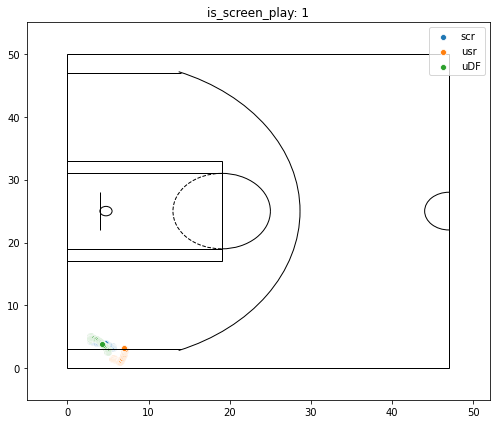

In [7]:
train_tmp = train[train["filename"] == "0000"]

plt.figure(figsize=(7, 6))
sns.scatterplot(train_tmp["scr_x"], train_tmp["scr_y"], label="scr")
sns.scatterplot(train_tmp["usr_x"], train_tmp["usr_y"], label="usr")
sns.scatterplot(train_tmp["uDF_x"], train_tmp["uDF_y"], label="uDF")
DrawNBACourt().plot()
plt.xlim(0 - 5, x_length + 5)
plt.ylim(0 - 5, y_length + 5)
plt.xlabel("")
plt.ylabel("")
plt.title(f'is_screen_play: {train_tmp["is_screen_play"].iloc[0]}')
plt.legend()
plt.tight_layout()
plt.show()

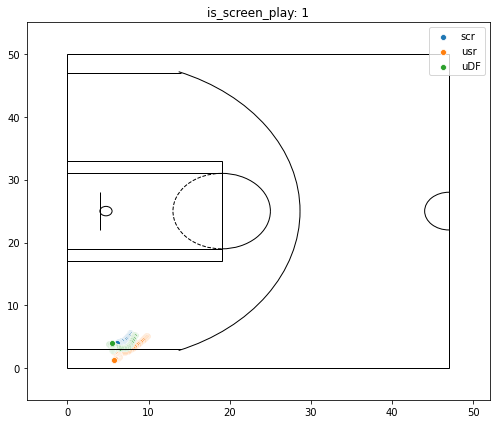

In [8]:
file_number = "0001"
train_tmp = train[train["filename"] == file_number]

plt.figure(figsize=(7, 6))
sns.scatterplot(train_tmp["scr_x"], train_tmp["scr_y"], label="scr")
sns.scatterplot(train_tmp["usr_x"], train_tmp["usr_y"], label="usr")
sns.scatterplot(train_tmp["uDF_x"], train_tmp["uDF_y"], label="uDF")
DrawNBACourt().plot()
plt.xlim(0 - 5, x_length + 5)
plt.ylim(0 - 5, y_length + 5)
plt.xlabel("")
plt.ylabel("")
plt.title(f'is_screen_play: {train_tmp["is_screen_play"].iloc[0]}')
plt.legend()
plt.tight_layout()
plt.show()

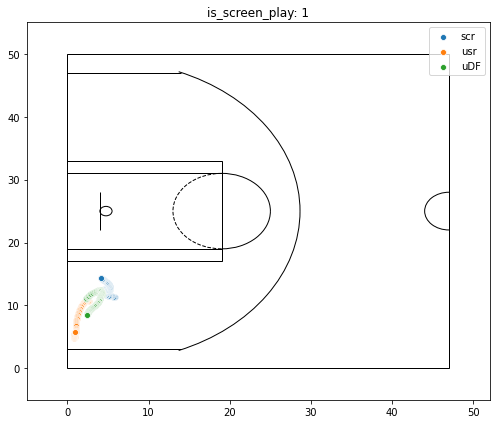

In [9]:
file_number = "0002"
train_tmp = train[train["filename"] == file_number]

plt.figure(figsize=(7, 6))
sns.scatterplot(train_tmp["scr_x"], train_tmp["scr_y"], label="scr")
sns.scatterplot(train_tmp["usr_x"], train_tmp["usr_y"], label="usr")
sns.scatterplot(train_tmp["uDF_x"], train_tmp["uDF_y"], label="uDF")
DrawNBACourt().plot()
plt.xlim(0 - 5, x_length + 5)
plt.ylim(0 - 5, y_length + 5)
plt.xlabel("")
plt.ylabel("")
plt.title(f'is_screen_play: {train_tmp["is_screen_play"].iloc[0]}')
plt.legend()
plt.tight_layout()
plt.show()

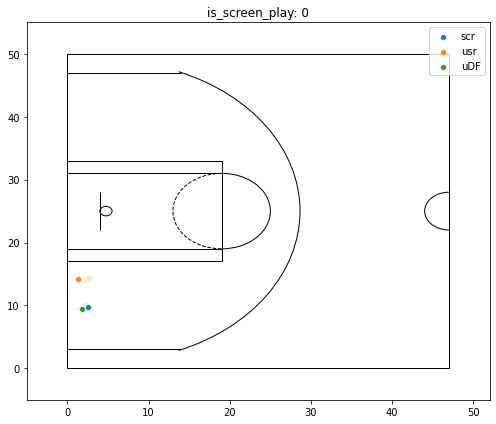

In [10]:
file_number = "0400"
train_tmp = train[train["filename"] == file_number]

plt.figure(figsize=(7, 6))
sns.scatterplot(train_tmp["scr_x"], train_tmp["scr_y"], label="scr")
sns.scatterplot(train_tmp["usr_x"], train_tmp["usr_y"], label="usr")
sns.scatterplot(train_tmp["uDF_x"], train_tmp["uDF_y"], label="uDF")
DrawNBACourt().plot()
plt.xlim(0 - 5, x_length + 5)
plt.ylim(0 - 5, y_length + 5)
plt.xlabel("")
plt.ylabel("")
plt.title(f'is_screen_play: {train_tmp["is_screen_play"].iloc[0]}')
plt.legend()
plt.tight_layout()
plt.show()

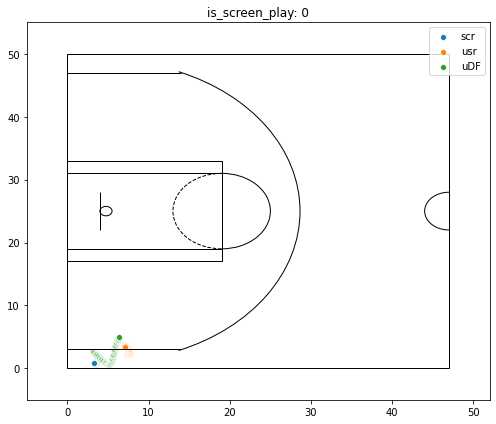

In [11]:
file_number = "0401"
train_tmp = train[train["filename"] == file_number]

plt.figure(figsize=(7, 6))
sns.scatterplot(train_tmp["scr_x"], train_tmp["scr_y"], label="scr")
sns.scatterplot(train_tmp["usr_x"], train_tmp["usr_y"], label="usr")
sns.scatterplot(train_tmp["uDF_x"], train_tmp["uDF_y"], label="uDF")
DrawNBACourt().plot()
plt.xlim(0 - 5, x_length + 5)
plt.ylim(0 - 5, y_length + 5)
plt.xlabel("")
plt.ylabel("")
plt.title(f'is_screen_play: {train_tmp["is_screen_play"].iloc[0]}')
plt.legend()
plt.tight_layout()
plt.show()